<a href="https://colab.research.google.com/github/Alexflames/frame-detection/blob/master/Unet_frame_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Автор
Григорьев Алексей, 451 группа, КНиИТ

## Задание
С помощью машинного обучения научиться различать рамки у картин для последующего вырезания и превращения изображений картин с рамками в картины **без** рамок

### Часть 2 - решение с использованием Unet
##### **"Простой" набор данных**
[Первый набор данных](https://drive.google.com/open?id=19Wx9l9C6IovJ5n1OTYzmt39w5cmIgzHJ) представляет 200 "простых для обработки" изображений картин с рамками,
собраны в поисковике google, посредством фильтрации подходящих вручную.
- **Все** картины имеют рамки;
- Картины **не** повернуты под углом;
- Может быть свободное пространство любого цвета **до** рамки, **после** рамки перед изображением;
- Рамки преимущественно монотонные, но также иногда встречаются объмные варианты;
- Возможно наличие теней или других эффектов окружающего мира на центральной части изображения / с какой-то стороны от картины;
- Форматы изображений `.jpg | .png | .webp`;
- Изображения разных размеров, разное соотношение сторон;
- Различная цветовая гамма.

##### **Материал**
- [Использование Unet для решения своей задачи](https://medium.com/coinmonks/learn-how-to-train-u-net-on-your-dataset-8e3f89fbd623)
- [Гит-репозитории в Google Colab](https://medium.com/@ashwindesilva/how-to-use-google-colaboratory-to-clone-a-github-repository-e07cf8d3d22b)
- [Оригинальный репозиторий с Unet](https://github.com/zhixuhao/unet)
- [Подходящая версия под первую статью](https://github.com/zhixuhao/unet/commit/4b939a4dbd930eeaf3d6fffcb514860cb11c948d)

##### **Программа**
Далее следуют фрагменты программы для решения задачи



**Шаг №1**

Подключаем гугл-диск, клонируем мой форк оригинального Unet-репозитория.

Форк необходим так как исходный код немного модифицирован, ветка frame-detection создана из коммита *4b939a4dbd930eeaf3d6fffcb514860cb11c948d*

В ней заменены некоторые `.py` исходники в соответствии со статьей выше **и моей задачей**.

In [1]:
from google.colab import drive
print("Если код выводит ошибки типа [Errno 2], игнорируйте их. Эти ошибки не мешают выполнению программы\n")
drive.mount('/content/gdrive')
# Замените путь после 'My Drive' на ваш собственный путь с проектом и данными
%cd gdrive/My Drive/Studies2/ML
# следующий фрагмент необходимо использовать только 1 раз в Вашем гугл-диске!!!
#! git clone https://github.com/Alexflames/unet.git
%cd unet
#! git pull
#! git checkout frame-detection
#! git branch
%cd ..

Если код выводит ошибки типа [Errno 2], игнорируйте их. Эти ошибки не мешают выполнению программы

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
/content/gdrive/My Drive/Studies2/ML
/content/gdrive/My Drive/Studies2/ML/unet
/content/gdrive/My Drive/Studies2/ML


#### **Шаг №2: Подготовка изображений**
Определим вспомогательные функции для визуализации выбранных изображений




In [0]:
from matplotlib import pyplot as plt
import numpy as np
import cv2
import os

def nearest_square(limit):
    answer = 0
    while (answer+1)**2 < limit:
        answer += 1
    return (answer + 2)

# Функция отображения выборки изображений из папки на экран
def show_images(folder_name, X_images, random_index, figsize=14):
  filenames = []
  for filename in os.listdir(folder_name):
    if not filename.endswith(('.jpg', '.tif')):
      continue
    filenames.append(os.path.join(folder_name, filename))
 
  chosen_pictures = []
  print (len(filenames))
  for i_normal, index in enumerate(random_index):
    img_picked = cv2.imread(filenames[index])
    chosen_pictures.append(img_picked)

  X_nearest_square = nearest_square(X_images) - 1 # расположим X фигур в квадрате
  fig, axeslist = plt.subplots(ncols = X_nearest_square, nrows = X_nearest_square)
  
  for i in range(len(chosen_pictures)):
    img_picked = chosen_pictures[i]
    axeslist.ravel()[i].imshow(img_picked[:, :, ::-1]) # показ переведенного из BGR в RGB изображения
    #axeslist.ravel()[i].set_axis_off()
  
  plt.rcParams["figure.figsize"] = (figsize,figsize)
  plt.show()

X_images = 9
random_index = np.random.choice((30), X_images)

#show_images("image_dataset_unet", X_images, random_index, figsize=9)
#show_images("labels_dataset_unet", X_images, random_index, figsize=9)
#show_images("labels_dataset_unet_content_dirty", X_images, random_index, figsize=9)
#show_images("labels_dataset_unet_content_dirty2", X_images, random_index, figsize=9)

Подготовим изображения: сделаем единый размер и расширения файлов

(1, 'jpg')
(2, 'jpg')
(3, 'jpg')
(4, 'jpg')
(5, 'jpg')
(6, 'jpg')
(7, 'jpg')
(9, 'jpg')
(11, 'jpg')
(12, 'jpg')
(15, 'jpg')
(16, 'jpg')
(17, 'jpg')
(18, 'jpg')
(20, 'jpg')
(21, 'jpg')
(22, 'jpg')
(23, 'jpg')
(24, 'jpg')
(25, 'jpg')
(26, 'jpg')
(27, 'jpg')
(28, 'jpg')
(29, 'jpg')
(30, 'jpg')
(31, 'jpg')
(32, 'jpg')
(33, 'jpg')
(34, 'jpg')
(35, 'jpg')
30


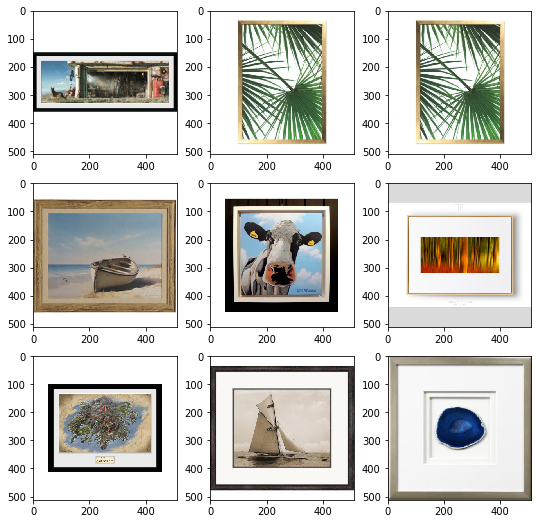

In [3]:
# Подготовка изображений!
# Необходимо раскомментировать самую нижнюю строку чтобы запустить
from PIL import Image
from skimage import data, io, filters
import numpy as np
from scipy import ndimage
from matplotlib import pyplot as plt
from sklearn import manifold, datasets
import os
import cv2
import time
import sys
import glob

# Следующие 2 функции для ресайза изображения и дополнения до квадрата
# Взято из 3 практики по ML
def add_pad(img, shape):
    color_pick = img[0][0]
    padded_img = color_pick * np.ones(shape + img.shape[2:3], dtype=np.uint8)
    x_offset = int((padded_img.shape[0] - img.shape[0]) / 2)
    y_offset = int((padded_img.shape[1] - img.shape[1]) / 2)
    padded_img[x_offset:x_offset + img.shape[0], y_offset:y_offset + img.shape[1]] = img
    return padded_img


def resize(img, shape):
    scale = min(shape[0] * 1.0 / img.shape[0], shape[1] * 1.0 / img.shape[1])
    if scale != 1:
        img = cv2.resize(img, dsize=None, fx=scale, fy=scale, interpolation=cv2.INTER_LINEAR)
    return img


def prepare_images(path_from, path_save_to):
  files = glob.glob(path_save_to + '/*')
  for f in files:
    os.remove(f)

  filenames = []
  for i, file in enumerate(os.listdir(path_from)):
    if not file.endswith(('.jpg', '.jpeg', '.png')):
      continue
    extension = file.split('.')[1]
    filenames.append((int(file[3:-(len(extension)+1)]), extension))
  filenames.sort(key=lambda x: x[0])
  for i, file in enumerate(filenames):
    print(file)
    img = io.imread(path_from + '/pic' + str(file[0]) + '.' + file[1])
    #Subsection of the image
    img = resize(img, (512, 512))
    img = add_pad(img, (512, 512))

    path = str(i) + '.tif'
    io.imsave(path_save_to + '/' + path, img)

prepare_images("image_dataset_unet", "unet/data/train/image")
show_images("unet/data/train/image", X_images, random_index)

(1, 'jpg')
(2, 'jpg')
(3, 'jpg')
(4, 'jpg')
(5, 'jpg')
(6, 'jpg')
(7, 'jpg')
(9, 'jpg')
(11, 'jpg')
(12, 'jpg')
(15, 'jpg')
(16, 'jpg')
(17, 'jpg')
(18, 'jpg')
(20, 'jpg')
(21, 'jpg')
(22, 'jpg')
(23, 'jpg')
(24, 'jpg')
(25, 'jpg')
(26, 'jpg')
(27, 'jpg')
(28, 'jpg')
(29, 'jpg')
(30, 'jpg')
(31, 'jpg')
(32, 'jpg')
(33, 'jpg')
(34, 'jpg')
(35, 'jpg')
30


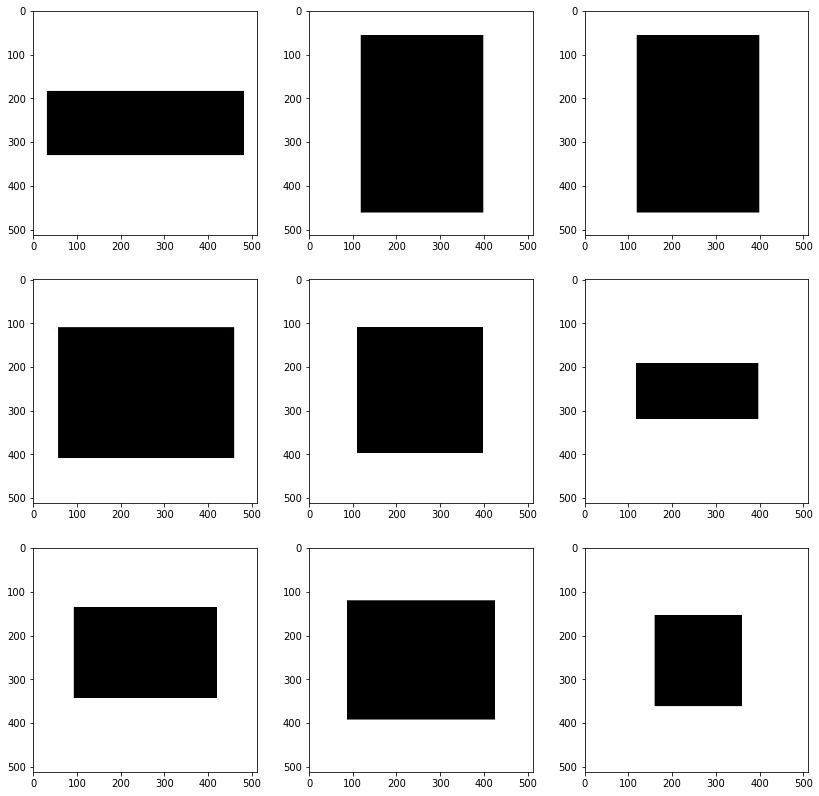

In [4]:
prepare_images("labels_dataset_unet_content_dirty", "unet/data/train/label")
show_images("unet/data/train/label", X_images, random_index)

In [5]:
prepare_images("test_dataset_unet", "unet/data/test")

(147, 'jpg')
(148, 'jpg')
(149, 'png')
(150, 'jpg')
(151, 'jpg')
(152, 'jpg')
(153, 'jpg')
(154, 'jpg')
(155, 'jpg')
(156, 'jpg')
(157, 'png')
(158, 'jpg')
(159, 'jpg')
(160, 'jpg')
(162, 'jpg')
(181, 'jpg')
(184, 'jpg')
(185, 'jpg')
(186, 'jpg')
(187, 'png')
(188, 'png')
(189, 'jpg')
(190, 'png')
(191, 'jpg')
(200, 'jpg')


#### **Шаг 3 - обучение и запуск нейросети**
[Ссылка на data.py - подготовка данных](https://github.com/Alexflames/unet/blob/frame-detection/data.py)


In [13]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import numpy as np 
import os
import glob
import shutil
#import cv2
#from libtiff import TIFF

class myAugmentation(object):
	
	"""
	A class used to augmentate image
	Firstly, read train image and label seperately, and then merge them together for the next process
	Secondly, use keras preprocessing to augmentate image
	Finally, seperate augmentated image apart into train image and label
	"""

	def __init__(self, train_path="unet/data/train/image", label_path="unet/data/train/label", merge_path="unet/data/train/merge", 
              aug_merge_path="unet/data/train/aug_merge", aug_train_path="unet/data/train/aug_train", aug_label_path="unet/data/train/aug_label", img_type="tif"):
		
		"""
		Using glob to get all .img_type form path
		"""

		self.train_imgs = glob.glob(train_path+"/*."+img_type)
		self.label_imgs = glob.glob(label_path+"/*."+img_type)
		self.train_path = train_path
		self.label_path = label_path
		self.merge_path = merge_path
		self.img_type = img_type
		self.aug_merge_path = aug_merge_path
		self.aug_train_path = aug_train_path
		self.aug_label_path = aug_label_path
		self.slices = len(self.train_imgs)
		self.datagen = ImageDataGenerator(
							        #rotation_range=0.2,
							        width_shift_range=0.05,
							        height_shift_range=0.05,
							        shear_range=0.05,
							        zoom_range=0.05,
							        horizontal_flip=True,
							        fill_mode='nearest')

	def Augmentation(self):

		"""
		Start augmentation.....
		"""
		trains = self.train_imgs
		labels = self.label_imgs
		path_train = self.train_path
		path_label = self.label_path
		path_merge = self.merge_path
		imgtype = self.img_type
		path_aug_merge = self.aug_merge_path
		files = glob.glob(path_merge + '/*')
		for f in files:
				os.remove(f)
		folders = glob.glob(path_aug_merge + '/*')
		for f in folders:
				shutil.rmtree(f)
		if len(trains) != len(labels) or len(trains) == 0 or len(trains) == 0:
			print(len(trains), "/", len(labels))
			print("trains can't match labels")
			return 0
		for i in range(len(trains)):
			img_t = load_img(path_train+"/"+str(i)+"."+imgtype)
			img_l = load_img(path_label+"/"+str(i)+"."+imgtype)
			x_t = img_to_array(img_t)
			x_l = img_to_array(img_l)
			x_t[:,:,2] = x_l[:,:,0]
			img_tmp = array_to_img(x_t)
			img_tmp.save(path_merge+"/"+str(i)+"."+imgtype)
			img = x_t
			img = img.reshape((1,) + img.shape)
			savedir = path_aug_merge + "/" + str(i)
			if not os.path.lexists(savedir):
				os.mkdir(savedir)
			self.doAugmentate(img, savedir, str(i))


	def doAugmentate(self, img, save_to_dir, save_prefix, batch_size=1, save_format='tif', imgnum=5):

		"""
		augmentate one image
		"""
		datagen = self.datagen
		i = 0
		for batch in datagen.flow(img,
                          batch_size=batch_size,
                          save_to_dir=save_to_dir,
                          save_prefix=save_prefix,
                          save_format=save_format):
		    i += 1
		    if i > imgnum:
		        break

	def splitMerge(self):
		"""
		split merged image apart
		"""
		path_merge = self.aug_merge_path
		path_train = self.aug_train_path
		path_label = self.aug_label_path
		folders = glob.glob(path_train + '/*')
		for f in folders:
				shutil.rmtree(f)
		folders = glob.glob(path_label + '/*')
		for f in folders:
				shutil.rmtree(f)
		for i in range(self.slices):
			path = path_merge + "/" + str(i)
			train_imgs = glob.glob(path+"/*."+self.img_type)
			savedir = path_train + "/" + str(i)
			if not os.path.lexists(savedir):
				os.mkdir(savedir)
			savedir = path_label + "/" + str(i)
			if not os.path.lexists(savedir):
				os.mkdir(savedir)
			for imgname in train_imgs:
				midname = imgname[imgname.rindex("/")+1:imgname.rindex("."+self.img_type)]
				img = cv2.imread(imgname)
				img_train = img[:,:,2]#cv2 read image rgb->bgr
				img_label = img[:,:,0]
				cv2.imwrite(path_train+"/"+str(i)+"/"+midname+"_train"+"."+self.img_type,img_train)
				cv2.imwrite(path_label+"/"+str(i)+"/"+midname+"_label"+"."+self.img_type,img_label)

	def splitTransform(self):

		"""
		split perspective transform images
		"""
		#path_merge = "transform"
		#path_train = "transform/data/"
		#path_label = "transform/label/"
		path_merge = self.merge_path
		path_train = self.train_path
		path_label = self.label_path
		train_imgs = glob.glob(path_merge+"/*."+self.img_type)
		for imgname in train_imgs:
			midname = imgname[imgname.rindex("/")+1:imgname.rindex("."+self.img_type)]
			img = cv2.imread(imgname)
			img_train = img[:,:,2]#cv2 read image rgb->bgr
			img_label = img[:,:,0]
			cv2.imwrite(path_train+"/"+midname+"."+self.img_type,img_train)
			cv2.imwrite(path_label+"/"+midname+"."+self.img_type,img_label)



class dataProcess(object):

	def __init__(self, out_rows, out_cols, data_path = "unet/data/train/image", label_path = "unet/data/train/label", test_path = "unet/data/test", npy_path = "unet/data/npydata", img_type = "tif"):

		"""
		
		"""

		self.out_rows = out_rows
		self.out_cols = out_cols
		self.data_path = data_path
		self.label_path = label_path
		self.img_type = img_type
		self.test_path = test_path
		self.npy_path = npy_path

	def create_train_data(self):
		i = 0
		print('-'*30)
		print('Creating training images...')
		print('-'*30)
		imgs = glob.glob(self.data_path+"/*."+self.img_type)
		print(len(imgs))
		imgdatas = np.ndarray((len(imgs),self.out_rows,self.out_cols,3), dtype=np.uint8)
		imglabels = np.ndarray((len(imgs),self.out_rows,self.out_cols,1), dtype=np.uint8)
		for imgname in imgs:
			midname = imgname[imgname.rindex("/")+1:]
			img = load_img(self.data_path + "/" + midname)
			label = load_img(self.label_path + "/" + midname, color_mode = "grayscale")
			img = img_to_array(img)
			label = img_to_array(label)
			#img = cv2.imread(self.data_path + "/" + midname,cv2.IMREAD_GRAYSCALE)
			#label = cv2.imread(self.label_path + "/" + midname,cv2.IMREAD_GRAYSCALE)
			#img = np.array([img])
			#label = np.array([label])
			imgdatas[i] = img
			imglabels[i] = label
			if i % 100 == 0:
				print('Done: {0}/{1} images'.format(i, len(imgs)))
			i += 1
		print('loading done')
		np.save(self.npy_path + '/imgs_train.npy', imgdatas)
		np.save(self.npy_path + '/imgs_mask_train.npy', imglabels)
		print('Saving to .npy files done.')

	def create_test_data(self):
		i = 0
		print('-'*30)
		print('Creating test images...')
		print('-'*30)
		imgs = glob.glob(self.test_path+"/*."+self.img_type)
		print(len(imgs))
		imgdatas = np.ndarray((len(imgs),self.out_rows,self.out_cols,3), dtype=np.uint8)
		for imgname in imgs:
			midname = imgname[imgname.rindex("/")+1:]
			img = load_img(self.test_path + "/" + midname)
			img = img_to_array(img)
			#img = cv2.imread(self.test_path + "/" + midname,cv2.IMREAD_GRAYSCALE)
			#img = np.array([img])
			imgdatas[i] = img
			i += 1
		print('loading done')
		np.save(self.npy_path + '/imgs_test.npy', imgdatas)
		print('Saving to imgs_test.npy files done.')

	def load_train_data(self):
		print('-'*30)
		print('load train images...')
		print('-'*30)
		imgs_train = np.load(self.npy_path+"/imgs_train.npy")
		imgs_mask_train = np.load(self.npy_path+"/imgs_mask_train.npy")
		imgs_train = imgs_train.astype('float32')
		imgs_mask_train = imgs_mask_train.astype('float32')
		imgs_train /= 255
		#mean = imgs_train.mean(axis = 0)
		#imgs_train -= mean	
		imgs_mask_train /= 255
		imgs_mask_train[imgs_mask_train > 0.5] = 1
		imgs_mask_train[imgs_mask_train <= 0.5] = 0
		return imgs_train,imgs_mask_train

	def load_test_data(self):
		print('-'*30)
		print('load test images...')
		print('-'*30)
		imgs_test = np.load(self.npy_path+"/imgs_test.npy")
		imgs_test = imgs_test.astype('float32')
		imgs_test /= 255
		#mean = imgs_test.mean(axis = 0)
		#imgs_test -= mean	
		return imgs_test

if __name__ == "__main__":

	#aug = myAugmentation()
	#aug.Augmentation()
	#aug.splitMerge()
	#aug.splitTransform()
	mydata = dataProcess(512,512)
	mydata.create_train_data()
	mydata.create_test_data()
	#imgs_train,imgs_mask_train = mydata.load_train_data()
	#print imgs_train.shape,imgs_mask_train.shape


------------------------------
Creating training images...
------------------------------
30
Done: 0/30 images
loading done
Saving to .npy files done.
------------------------------
Creating test images...
------------------------------
25
loading done
Saving to imgs_test.npy files done.


In [0]:
#!python unet/data.py

[Ссылка на unet.py - обучение и запуск сетки unet](https://github.com/Alexflames/unet/blob/frame-detection/unet.py)

In [10]:
  import glob
  import os
  
  files = glob.glob('unet.hdf5')
  for f in files:
    print("found model", f, ", deleting it")
    os.remove(f)

found model unet.hdf5 , deleting it


In [11]:
import os 
#os.environ["CUDA_VISIBLE_DEVICES"] = "0"
import numpy as np
from keras.models import *
from keras.layers import Input, concatenate, Conv2D, MaxPooling2D, UpSampling2D, Dropout, Cropping2D
from keras.optimizers import *
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras import backend as keras
import sklearn.model_selection as sk

class myUnet(object):

	def __init__(self, img_rows = 512, img_cols = 512):

		self.img_rows = img_rows
		self.img_cols = img_cols

	def load_data(self):

		mydata = dataProcess(self.img_rows, self.img_cols)
		imgs_train, imgs_mask_train = mydata.load_train_data()
		imgs_test = mydata.load_test_data()
		return imgs_train, imgs_mask_train, imgs_test

	def get_unet(self):

		inputs = Input((self.img_rows, self.img_cols,3))
		
		'''
		unet with crop(because padding = valid) 
		conv1 = Conv2D(64, 3, activation = 'relu', padding = 'valid', kernel_initializer = 'he_normal')(inputs)
		print "conv1 shape:",conv1.shape
		conv1 = Conv2D(64, 3, activation = 'relu', padding = 'valid', kernel_initializer = 'he_normal')(conv1)
		print "conv1 shape:",conv1.shape
		crop1 = Cropping2D(cropping=((90,90),(90,90)))(conv1)
		print "crop1 shape:",crop1.shape
		pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
		print "pool1 shape:",pool1.shape
		conv2 = Conv2D(128, 3, activation = 'relu', padding = 'valid', kernel_initializer = 'he_normal')(pool1)
		print "conv2 shape:",conv2.shape
		conv2 = Conv2D(128, 3, activation = 'relu', padding = 'valid', kernel_initializer = 'he_normal')(conv2)
		print "conv2 shape:",conv2.shape
		crop2 = Cropping2D(cropping=((41,41),(41,41)))(conv2)
		print "crop2 shape:",crop2.shape
		pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
		print "pool2 shape:",pool2.shape
		conv3 = Conv2D(256, 3, activation = 'relu', padding = 'valid', kernel_initializer = 'he_normal')(pool2)
		print "conv3 shape:",conv3.shape
		conv3 = Conv2D(256, 3, activation = 'relu', padding = 'valid', kernel_initializer = 'he_normal')(conv3)
		print "conv3 shape:",conv3.shape
		crop3 = Cropping2D(cropping=((16,17),(16,17)))(conv3)
		print "crop3 shape:",crop3.shape
		pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
		print "pool3 shape:",pool3.shape
		conv4 = Conv2D(512, 3, activation = 'relu', padding = 'valid', kernel_initializer = 'he_normal')(pool3)
		conv4 = Conv2D(512, 3, activation = 'relu', padding = 'valid', kernel_initializer = 'he_normal')(conv4)
		drop4 = Dropout(0.5)(conv4)
		crop4 = Cropping2D(cropping=((4,4),(4,4)))(drop4)
		pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)
		conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'valid', kernel_initializer = 'he_normal')(pool4)
		conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'valid', kernel_initializer = 'he_normal')(conv5)
		drop5 = Dropout(0.5)(conv5)
		up6 = Conv2D(512, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(drop5))
		merge6 = concatenate([crop4,up6],  axis = 3)
		conv6 = Conv2D(512, 3, activation = 'relu', padding = 'valid', kernel_initializer = 'he_normal')(merge6)
		conv6 = Conv2D(512, 3, activation = 'relu', padding = 'valid', kernel_initializer = 'he_normal')(conv6)
		up7 = Conv2D(256, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv6))
		merge7 = concatenate([crop3,up7],  axis = 3)
		conv7 = Conv2D(256, 3, activation = 'relu', padding = 'valid', kernel_initializer = 'he_normal')(merge7)
		conv7 = Conv2D(256, 3, activation = 'relu', padding = 'valid', kernel_initializer = 'he_normal')(conv7)
		up8 = Conv2D(128, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv7))
		merge8 = concatenate([crop2,up8],  axis = 3)
		conv8 = Conv2D(128, 3, activation = 'relu', padding = 'valid', kernel_initializer = 'he_normal')(merge8)
		conv8 = Conv2D(128, 3, activation = 'relu', padding = 'valid', kernel_initializer = 'he_normal')(conv8)
		up9 = Conv2D(64, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv8))
		merge9 = concatenate([crop1,up9],  axis = 3)
		conv9 = Conv2D(64, 3, activation = 'relu', padding = 'valid', kernel_initializer = 'he_normal')(merge9)
		conv9 = Conv2D(64, 3, activation = 'relu', padding = 'valid', kernel_initializer = 'he_normal')(conv9)
		conv9 = Conv2D(2, 3, activation = 'relu', padding = 'valid', kernel_initializer = 'he_normal')(conv9)
		'''

		conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(inputs)
		print ("conv1 shape:",conv1.shape)
		conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv1)
		print ("conv1 shape:",conv1.shape)
		pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
		print ("pool1 shape:",pool1.shape)

		conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool1)
		print ("conv2 shape:",conv2.shape)
		conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv2)
		print ("conv2 shape:",conv2.shape)
		pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
		print ("pool2 shape:",pool2.shape)

		conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool2)
		print ("conv3 shape:",conv3.shape)
		conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3)
		print ("conv3 shape:",conv3.shape)
		pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
		print ("pool3 shape:",pool3.shape)

		conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool3)
		conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv4)
		drop4 = Dropout(0.5)(conv4)
		pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)

		conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool4)
		conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv5)
		drop5 = Dropout(0.5)(conv5)

		up6 = Conv2D(512, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(drop5))
		merge6 = concatenate([drop4,up6], axis = 3)
		conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge6)
		conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv6)

		up7 = Conv2D(256, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv6))
		merge7 = concatenate([conv3,up7], axis = 3)
		conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge7)
		conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv7)

		up8 = Conv2D(128, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv7))
		merge8 = concatenate([conv2,up8], axis = 3)
		conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge8)
		conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv8)

		up9 = Conv2D(64, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv8))
		merge9 = concatenate([conv1,up9], axis = 3)
		conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge9)
		conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
		conv9 = Conv2D(2, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
		conv10 = Conv2D(1, 1, activation = 'sigmoid')(conv9)

		model = Model(input = inputs, output = conv10)

		model.compile(optimizer = Adam(lr = 1e-4), loss = 'binary_crossentropy', metrics = ['accuracy'])

		return model


	def train(self):
		print("loading data")
		imgs_train, imgs_mask_train, imgs_test = self.load_data()
		imgs_train, imgs_val, imgs_mask_train, imgs_mask_val = sk.train_test_split(imgs_train,imgs_mask_train,test_size=0.25)
		print("loading data done")
		model = self.get_unet()
		print("got unet")
  
		datagen = ImageDataGenerator(
							        rotation_range=0.1,
							        width_shift_range=0.15,
							        height_shift_range=0.15,
							        shear_range=0.15,
							        zoom_range=0.15,
							        horizontal_flip=True,
							        fill_mode='nearest')
  
		model_checkpoint = ModelCheckpoint('unet.hdf5', monitor='loss',verbose=1, save_best_only=True)
		print('Fitting model...')
		model.fit_generator(datagen.flow(imgs_train, imgs_mask_train, batch_size=4), steps_per_epoch=4, epochs=10, verbose=1,validation_data=(imgs_val, imgs_mask_val), shuffle=True, callbacks=[model_checkpoint])

		print('predict test data')
		imgs_mask_test = model.predict(imgs_test, batch_size=1, verbose=1)
		np.save('unet/data/results/imgs_mask_test.npy', imgs_mask_test)

	def save_img(self):

		print("array to image")
		imgs = np.load('unet/data/results/imgs_mask_test.npy')
		for i in range(imgs.shape[0]):
			img = imgs[i]
			img = array_to_img(img)
			img.save("unet/data/results/%d.jpg"%(i))




if __name__ == '__main__':
	myunet = myUnet()
	myunet.train()
	myunet.save_img()


loading data
------------------------------
load train images...
------------------------------
------------------------------
load test images...
------------------------------
loading data done
conv1 shape: (?, 512, 512, 64)
conv1 shape: (?, 512, 512, 64)
pool1 shape: (?, 256, 256, 64)
conv2 shape: (?, 256, 256, 128)
conv2 shape: (?, 256, 256, 128)
pool2 shape: (?, 128, 128, 128)
conv3 shape: (?, 128, 128, 256)
conv3 shape: (?, 128, 128, 256)
pool3 shape: (?, 64, 64, 256)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:134: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("co...)`


got unet
Fitting model...
Epoch 1/10
4/4 [==============================] - 11s 3s/step - loss: 0.7291 - acc: 0.5839 - val_loss: 0.6281 - val_acc: 0.6299

Epoch 00001: loss improved from inf to 0.72051, saving model to unet.hdf5
Epoch 2/10
4/4 [==============================] - 3s 640ms/step - loss: 0.6378 - acc: 0.6484 - val_loss: 0.6204 - val_acc: 0.6300

Epoch 00002: loss improved from 0.72051 to 0.64021, saving model to unet.hdf5
Epoch 3/10
4/4 [==============================] - 3s 706ms/step - loss: 0.6336 - acc: 0.6392 - val_loss: 0.6082 - val_acc: 0.6345

Epoch 00003: loss improved from 0.64021 to 0.63360, saving model to unet.hdf5
Epoch 4/10
4/4 [==============================] - 3s 636ms/step - loss: 0.6708 - acc: 0.6141 - val_loss: 0.6370 - val_acc: 0.6333

Epoch 00004: loss did not improve from 0.63360
Epoch 5/10
4/4 [==============================] - 3s 707ms/step - loss: 0.5940 - acc: 0.6147 - val_loss: 0.5906 - val_acc: 0.6319

Epoch 00005: loss improved from 0.63360 to 0

In [0]:
#!python unet/unet.py

25


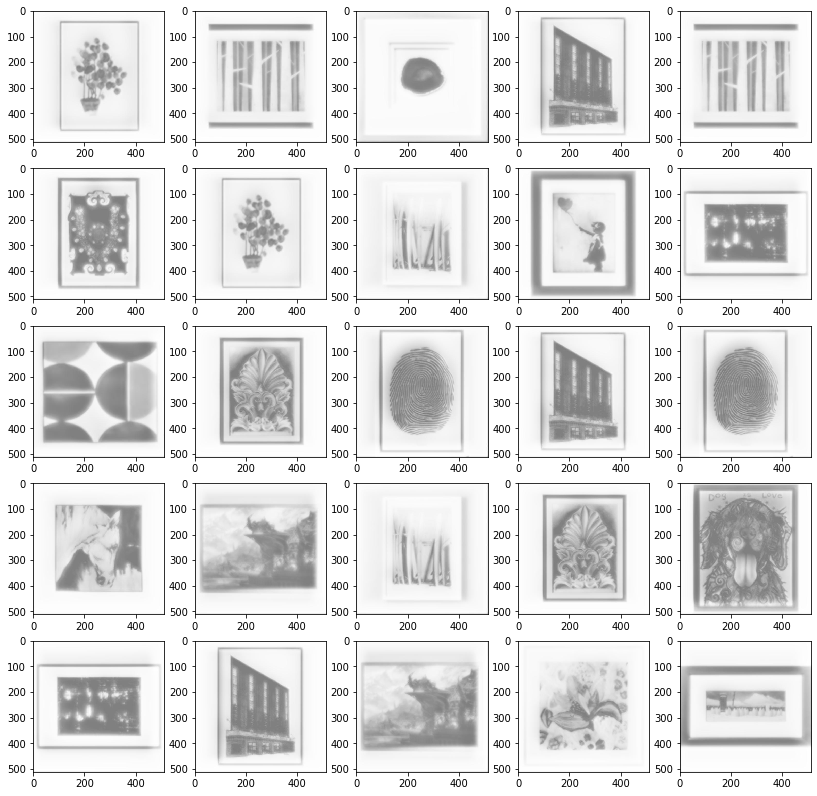

25


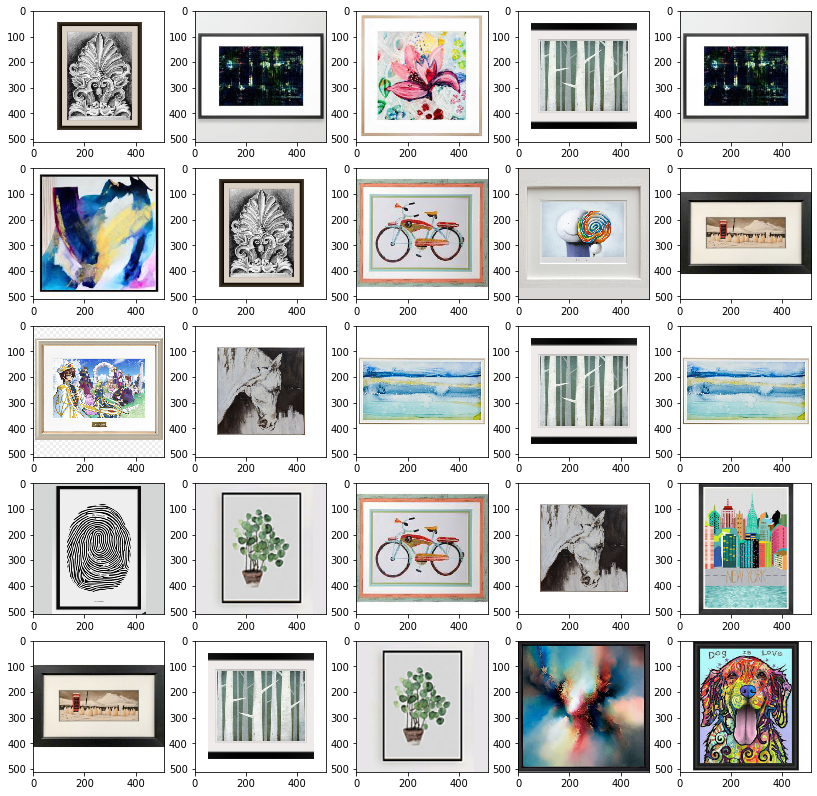

In [12]:
from matplotlib import pyplot as plt

N_images = 25
random_index = np.random.choice((N_images), N_images)
show_images("unet/data/results", N_images, random_index)
show_images("unet/data/test", N_images, random_index)

In [0]:
!ls

### **Интерпретация полученных результатов**
- При попытке использования разметки в виде рамок output нейросети либо **серая версия картины** (преобладание черных рамок по-видимому обучает его на выявление черного цвета); либо если сделать рамки более тонкими, то **пустые белые картины**
- При попытке использования разметки контента внутри рамок, появляется **серая версия картины, ограниченная некоторым квадратом**, за пределами квадрата пустота: такой результат нас тоже не устраивает